# CDFS SWIRE master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
37d9c0f (Tue Jul 18 17:43:07 2017 +0100)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))
#SUFFIX = "_20170718"

master_catalogue = Table.read("{}/master_catalogue_cdfs-swire{}.fits".format(OUT_DIR, SUFFIX))
print('Using masterlist ' + "{}/master_catalogue_cdfs-swire{}.fits".format(OUT_DIR, SUFFIX))

Using masterlist ./data/master_catalogue_cdfs-swire_20170801.fits


## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

/research/astro/fir/HELP/help_python/miniconda3/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


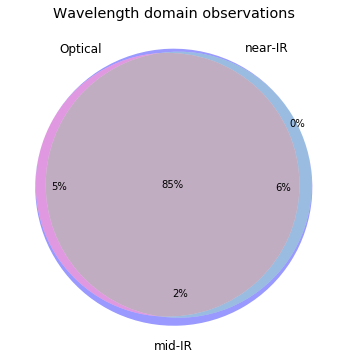

In [5]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

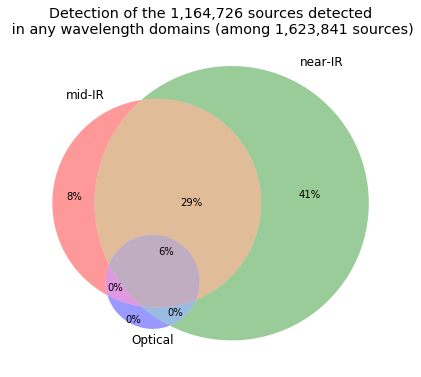

In [6]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["ATLAS u", "COMBO u"]
g_bands = ["ATLAS g",            "PS1 g"]
r_bands = ["ATLAS r", "COMBO r", "PS1 r"]
i_bands = ["ATLAS i", "COMBO i", "PS1 i"]
z_bands = ["ATLAS z",            "PS1 z"]
y_bands = [                      "PS1 y", "VIDEO y", "VHS y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

HELP warning: One or more of the columns is empty.


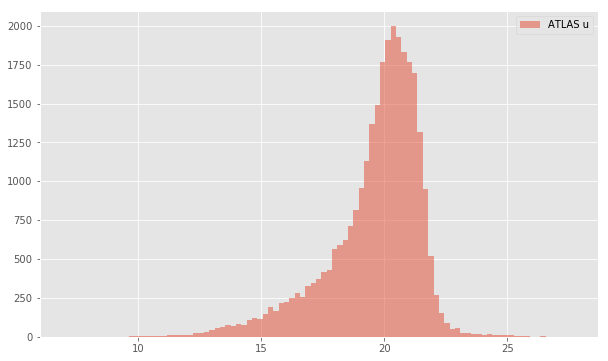

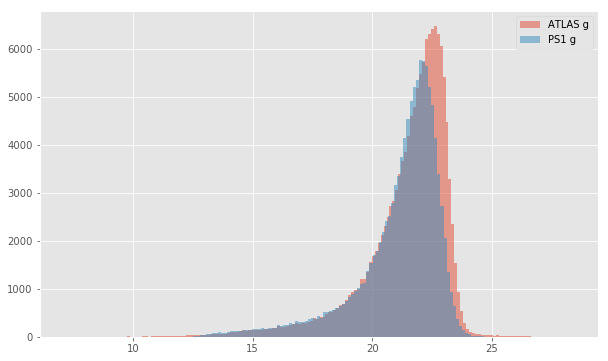

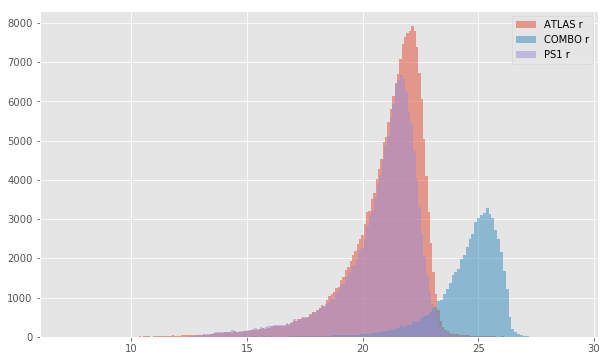

HELP warning: One or more of the columns is empty.


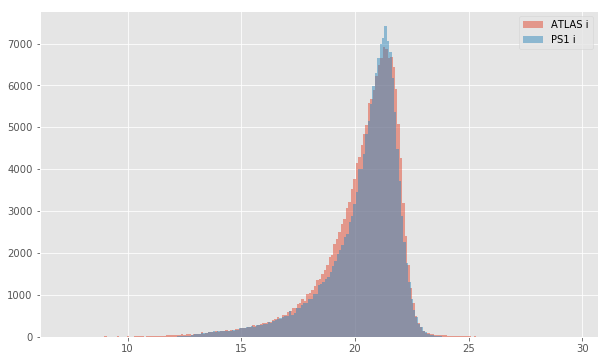

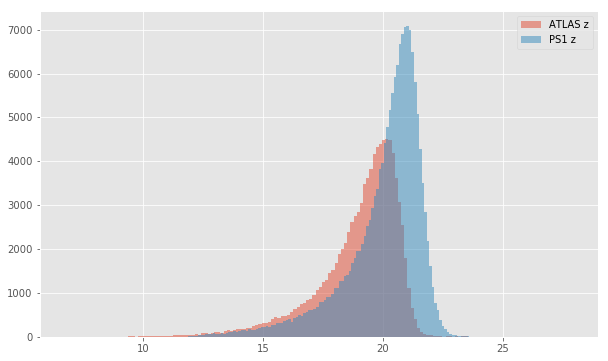

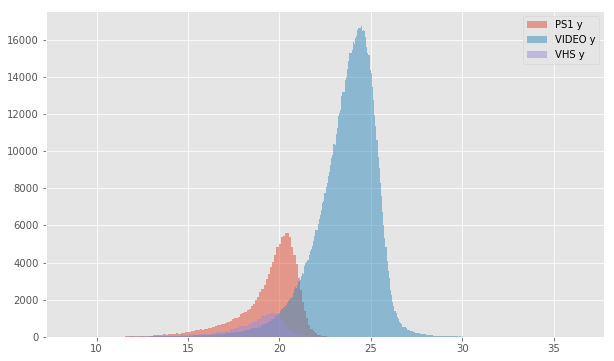

In [8]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

COMBO u (aperture) - ATLAS u (aperture):
- Median: 0.30
- Median Absolute Deviation: 0.07
- 1% percentile: 0.026031494140625
- 99% percentile: 5.898116226196289


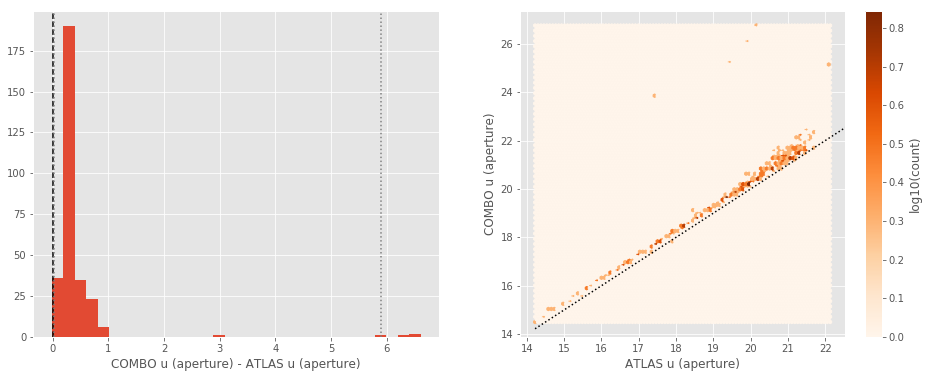

There are no overlapping magnitudes...
PS1 g (aperture) - ATLAS g (aperture):
- Median: -0.30
- Median Absolute Deviation: 0.27
- 1% percentile: -1.477933654785156
- 99% percentile: 1.4628313636779788


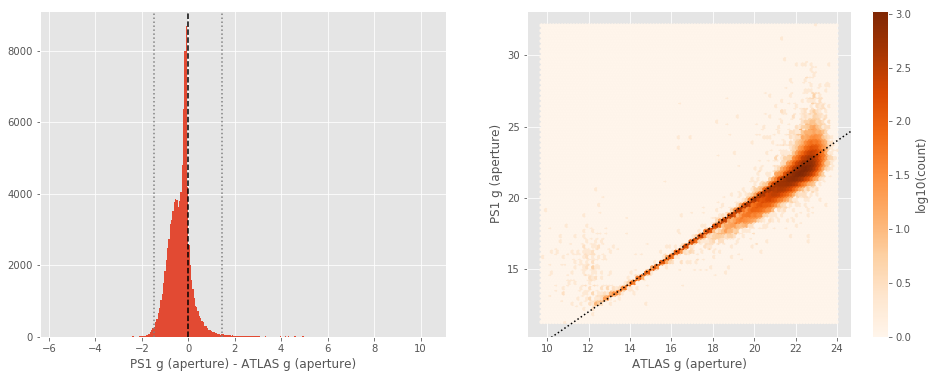

PS1 g (total) - ATLAS g (total):
- Median: -0.07
- Median Absolute Deviation: 0.16
- 1% percentile: -1.296688632965088
- 99% percentile: 0.7950097846984904


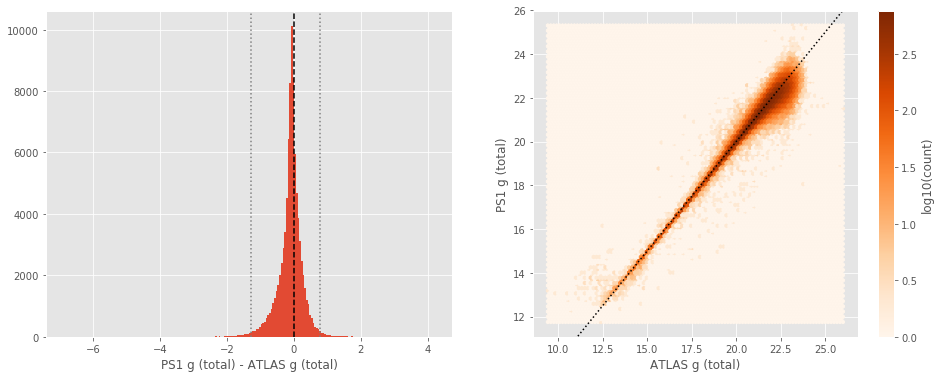

COMBO r (aperture) - ATLAS r (aperture):
- Median: 0.10
- Median Absolute Deviation: 0.13
- 1% percentile: -0.3106356048583985
- 99% percentile: 0.7375316619873049


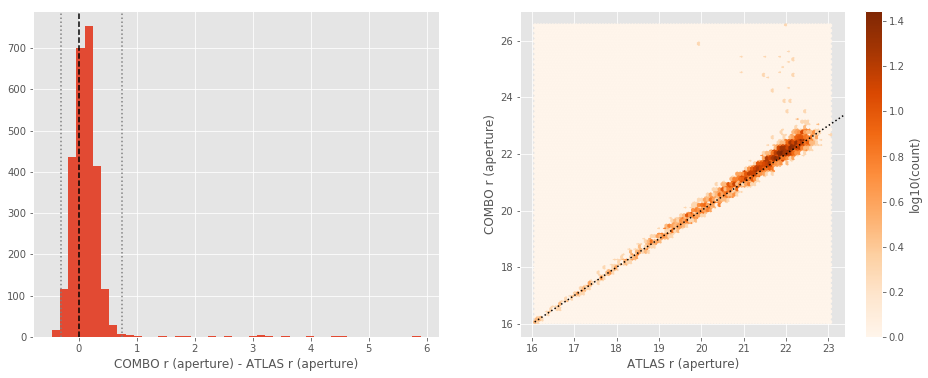

COMBO r (total) - ATLAS r (total):
- Median: -0.25
- Median Absolute Deviation: 0.15
- 1% percentile: -1.2209947586059569
- 99% percentile: 0.9199421310424809


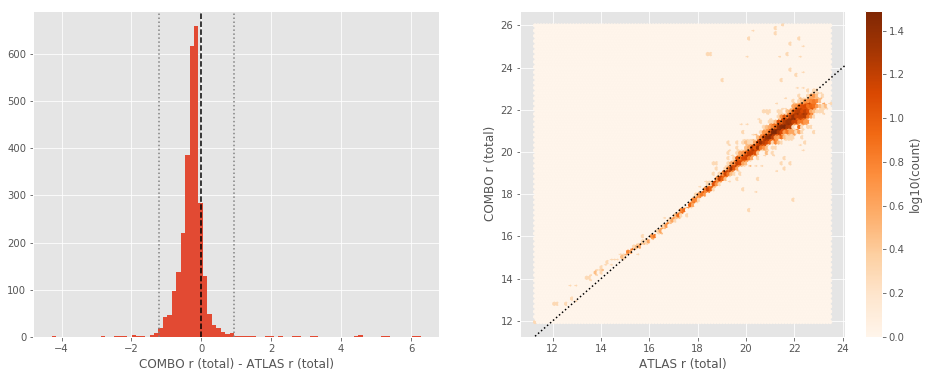

PS1 r (aperture) - ATLAS r (aperture):
- Median: -0.16
- Median Absolute Deviation: 0.22
- 1% percentile: -1.072125778198242
- 99% percentile: 1.2293571472167972


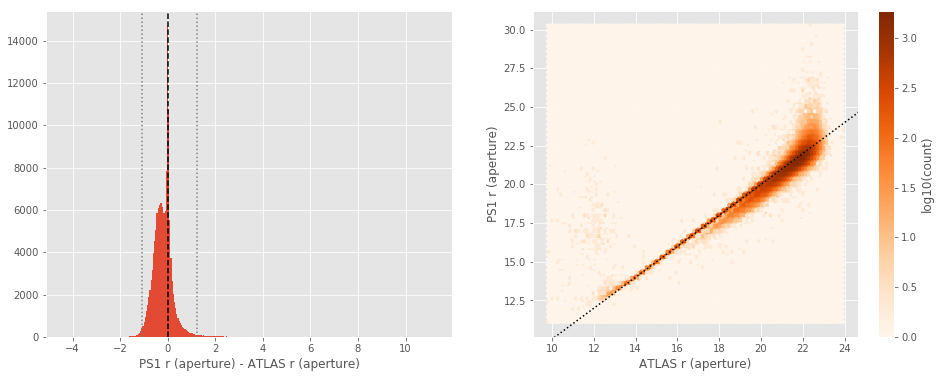

PS1 r (total) - ATLAS r (total):
- Median: 0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -0.922282371520996
- 99% percentile: 1.0283002471923828


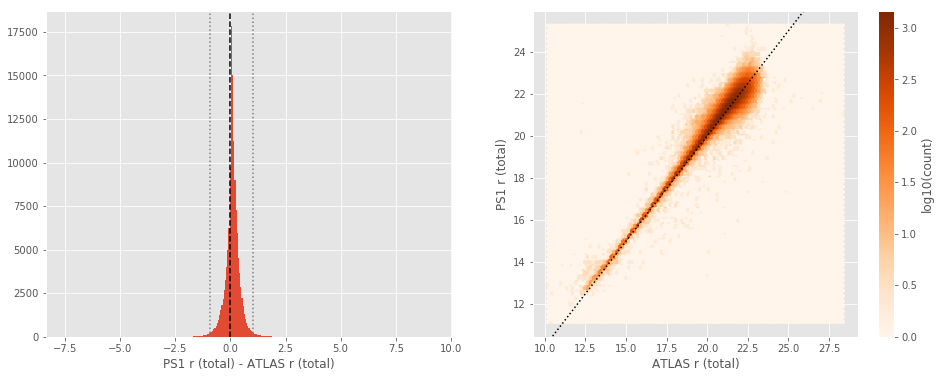

PS1 r (aperture) - COMBO r (aperture):
- Median: -0.25
- Median Absolute Deviation: 0.34
- 1% percentile: -1.379720687866211
- 99% percentile: 1.7204780578613306


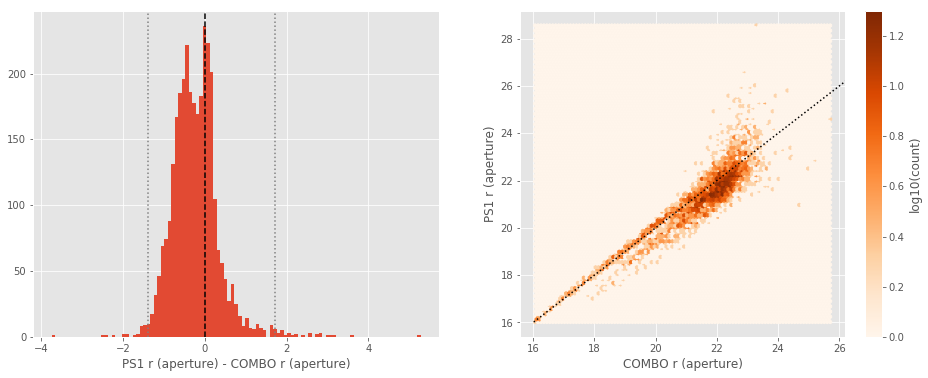

PS1 r (total) - COMBO r (total):
- Median: 0.34
- Median Absolute Deviation: 0.14
- 1% percentile: -0.486072883605957
- 99% percentile: 1.257844467163085


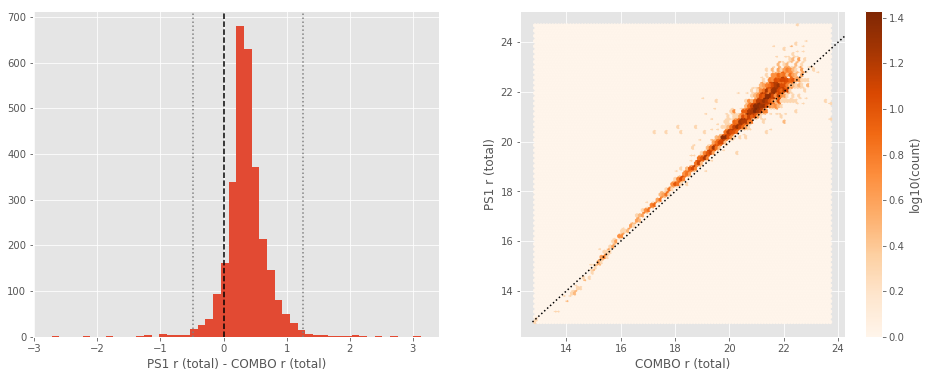

COMBO i (aperture) - ATLAS i (aperture):
- Median: -0.00
- Median Absolute Deviation: 0.16
- 1% percentile: -0.7342316436767578
- 99% percentile: 0.5792187499999985


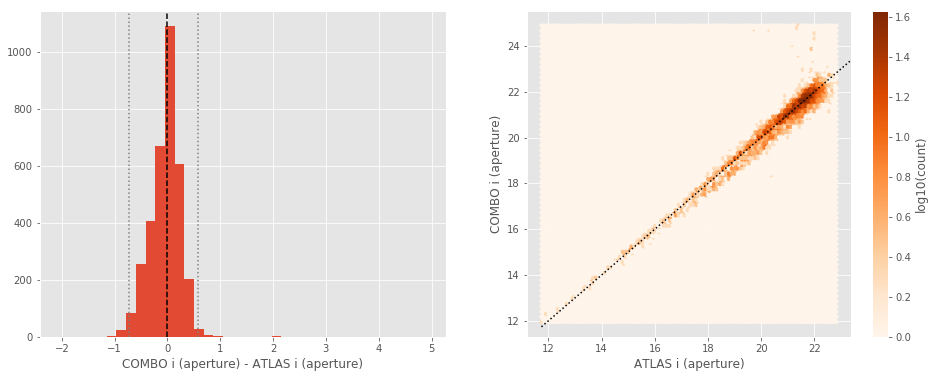

There are no overlapping magnitudes...
PS1 i (aperture) - ATLAS i (aperture):
- Median: -0.17
- Median Absolute Deviation: 0.19
- 1% percentile: -0.9848984146118165
- 99% percentile: 0.6653031349182128


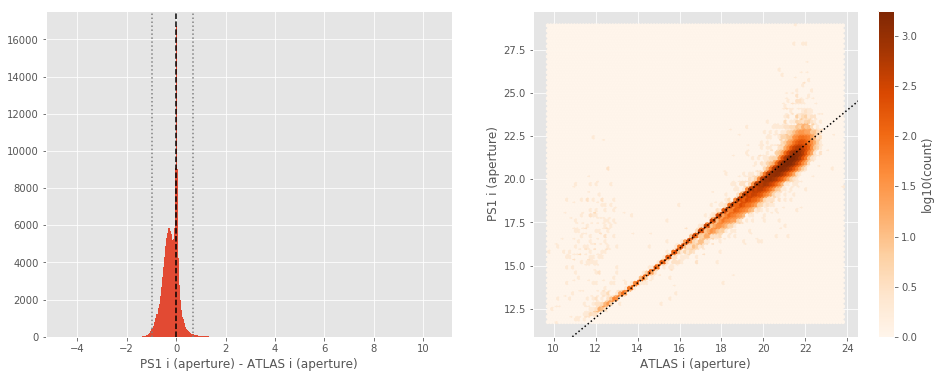

PS1 i (total) - ATLAS i (total):
- Median: 0.05
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8688420867919922
- 99% percentile: 0.8083547973632813


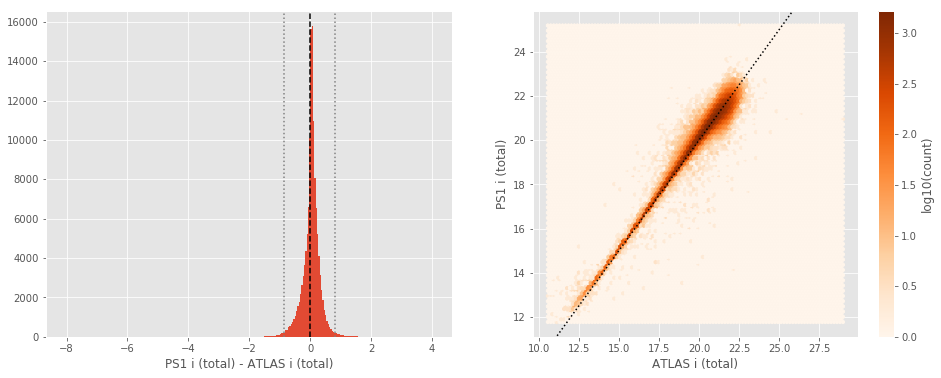

PS1 i (aperture) - COMBO i (aperture):
- Median: -0.15
- Median Absolute Deviation: 0.32
- 1% percentile: -1.2702113151550294
- 99% percentile: 1.1307513236999518


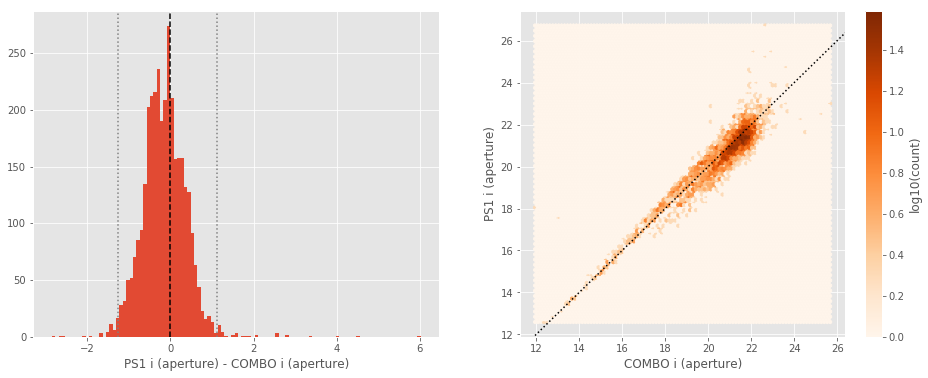

There are no overlapping magnitudes...
PS1 z (aperture) - ATLAS z (aperture):
- Median: 0.05
- Median Absolute Deviation: 0.14
- 1% percentile: -0.806519775390625
- 99% percentile: 0.6441340255737295


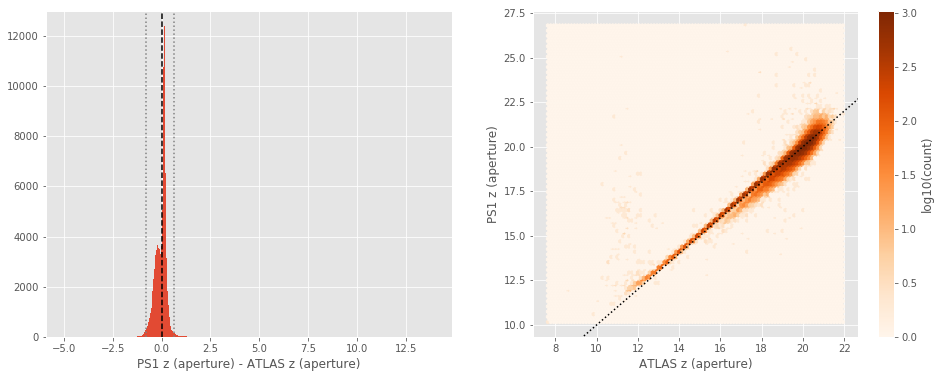

PS1 z (total) - ATLAS z (total):
- Median: 0.17
- Median Absolute Deviation: 0.11
- 1% percentile: -0.6282771301269532
- 99% percentile: 0.7950209236145019


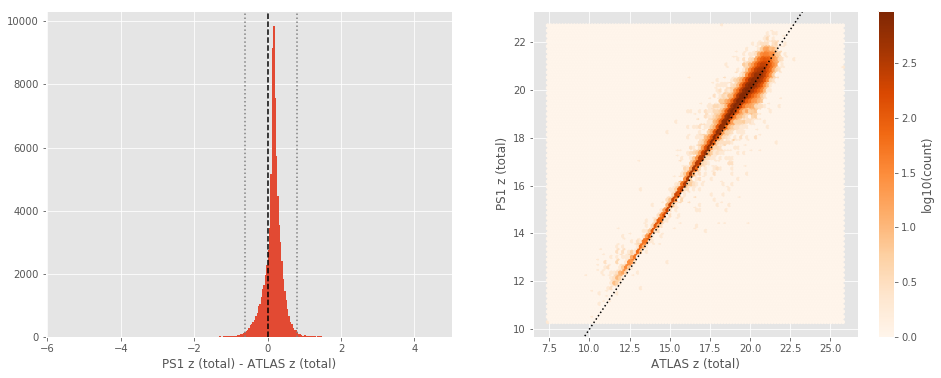

VIDEO y (aperture) - PS1 y (aperture):
- Median: 0.11
- Median Absolute Deviation: 0.16
- 1% percentile: -1.9402952575683594
- 99% percentile: 1.092313995361328


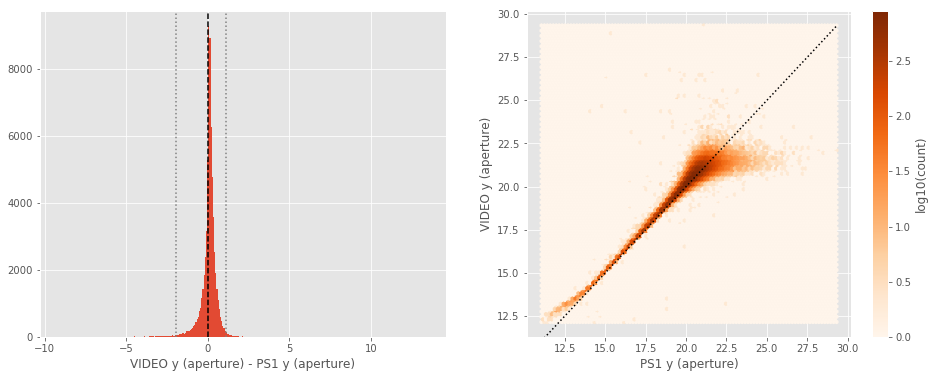

VIDEO y (total) - PS1 y (total):
- Median: -0.17
- Median Absolute Deviation: 0.15
- 1% percentile: -1.0102335739135742
- 99% percentile: 0.7463371849060056


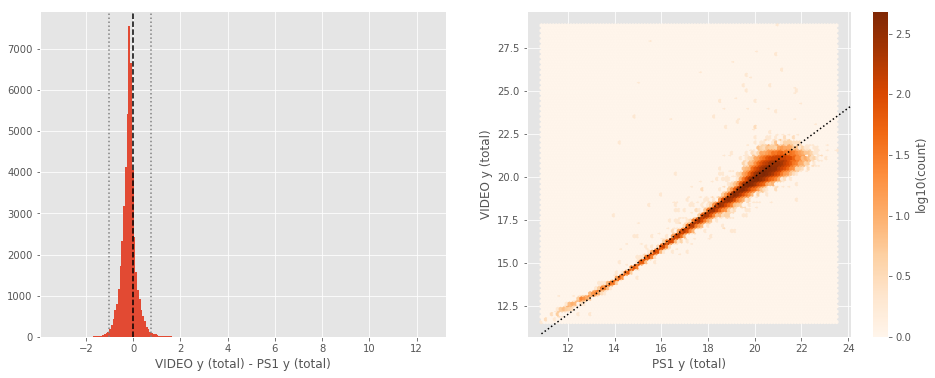

VHS y (aperture) - PS1 y (aperture):
- Median: -0.60
- Median Absolute Deviation: 0.16
- 1% percentile: -1.681834487915039
- 99% percentile: 0.14289306640624977


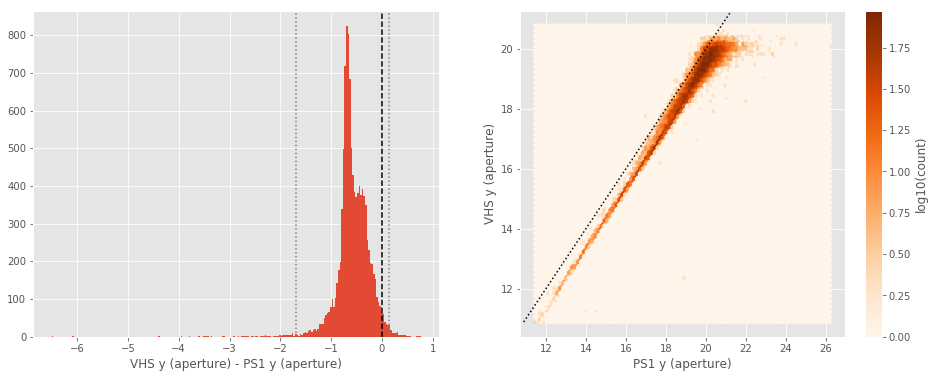

VHS y (total) - PS1 y (total):
- Median: -0.79
- Median Absolute Deviation: 0.15
- 1% percentile: -1.6650436401367188
- 99% percentile: 0.21801956176757842


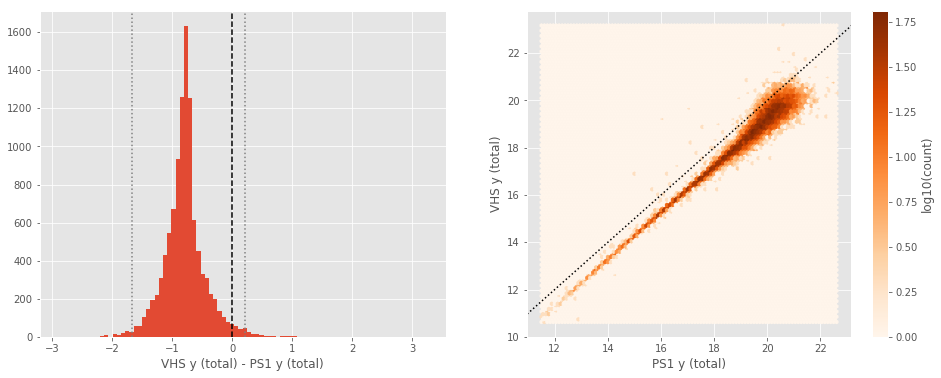

VHS y (aperture) - VIDEO y (aperture):
- Median: -0.68
- Median Absolute Deviation: 0.10
- 1% percentile: -1.3670636367797853
- 99% percentile: -0.1991042327880839


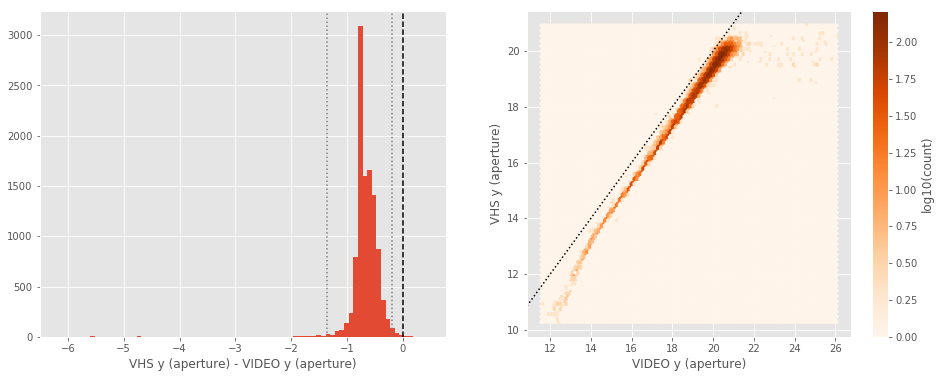

VHS y (total) - VIDEO y (total):
- Median: -0.61
- Median Absolute Deviation: 0.13
- 1% percentile: -1.3455268669128417
- 99% percentile: 0.33145490646362064


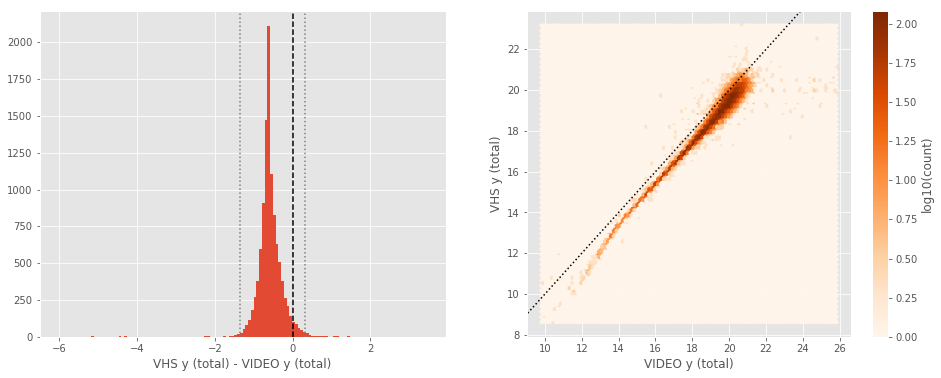

In [9]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to 2MASS to compare magnitudes.

In [10]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [11]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [12]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_CDFS-SWIRE.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

VIDEO J (total) - 2MASS J:
- Median: 0.06
- Median Absolute Deviation: 0.07
- 1% percentile: -1.170679257574255
- 99% percentile: 1.2492460728548254


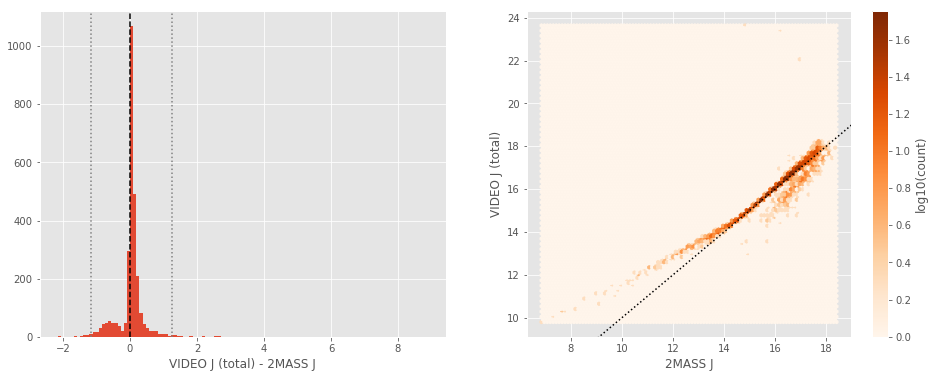

In [13]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_video_j'][ml_twomass_idx],
                labels=("2MASS J", "VIDEO J (total)"))

VIDEO Ks-like (total) - 2MASS Ks:
- Median: 0.04
- Median Absolute Deviation: 0.11
- 1% percentile: -1.120847605653624
- 99% percentile: 1.3628552576581423


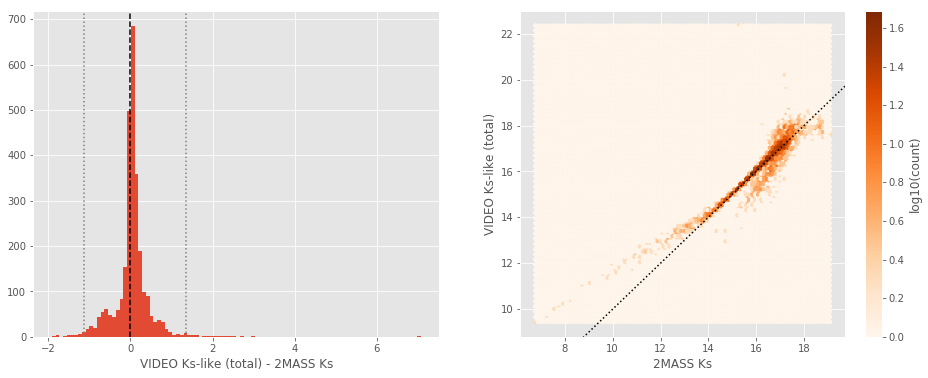

In [14]:
ukidss_ks_like = master_catalogue['m_video_k'] + 0.003 + 0.004 * (
    master_catalogue['m_video_j'] - master_catalogue['m_video_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "VIDEO Ks-like (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 146445 / 1623841 (9.02%)


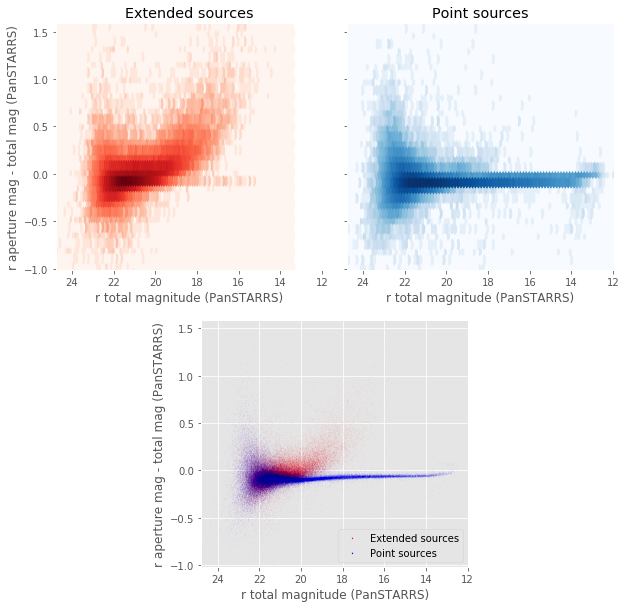

In [15]:
nb_ccplots(
    master_catalogue['m_ps1_r'],
    master_catalogue['m_ap_ps1_r'] - master_catalogue['m_ps1_r'],
    "r total magnitude (PanSTARRS)", "r aperture mag - total mag (PanSTARRS)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 43808 / 1623841 (2.70%)


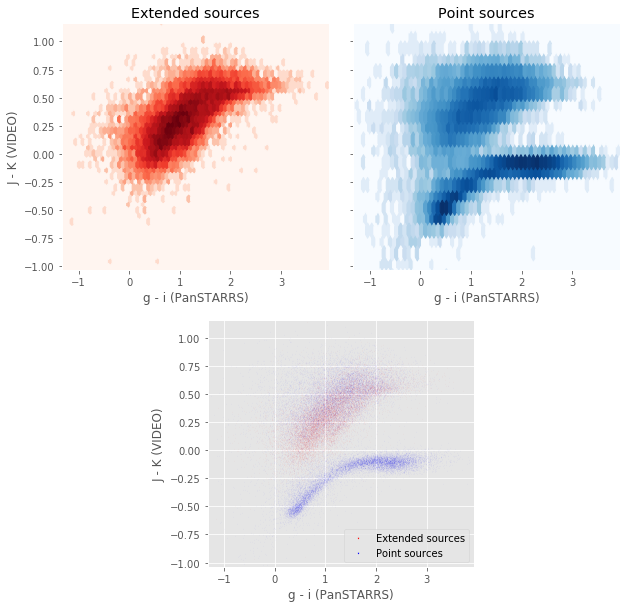

In [16]:
nb_ccplots(
    master_catalogue['m_ps1_g'] - master_catalogue['m_ps1_i'],
    master_catalogue['m_video_j'] - master_catalogue['m_video_k'],
    "g - i (PanSTARRS)", "J - K (VIDEO)",
    master_catalogue["stellarity"]
)

Number of source used: 64744 / 1623841 (3.99%)


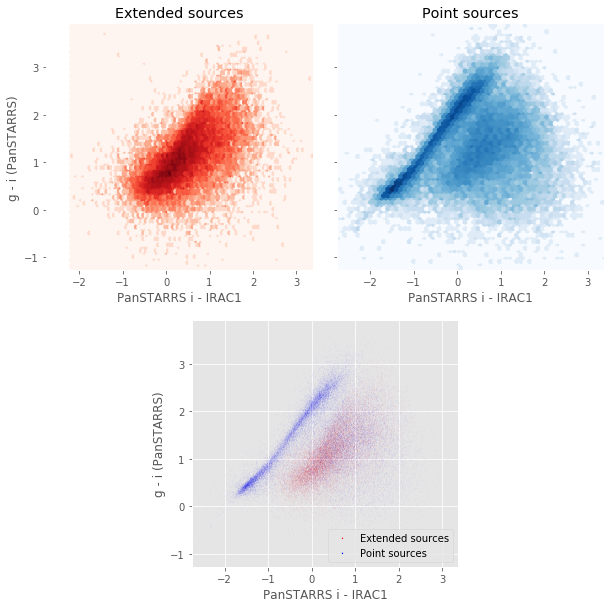

In [17]:
nb_ccplots(
    master_catalogue['m_ps1_i'] - master_catalogue['m_irac1'],
    master_catalogue['m_ps1_g'] - master_catalogue['m_ps1_i'],
    "PanSTARRS i - IRAC1", "g - i (PanSTARRS)",
    master_catalogue["stellarity"]
)

Number of source used: 18258 / 1623841 (1.12%)


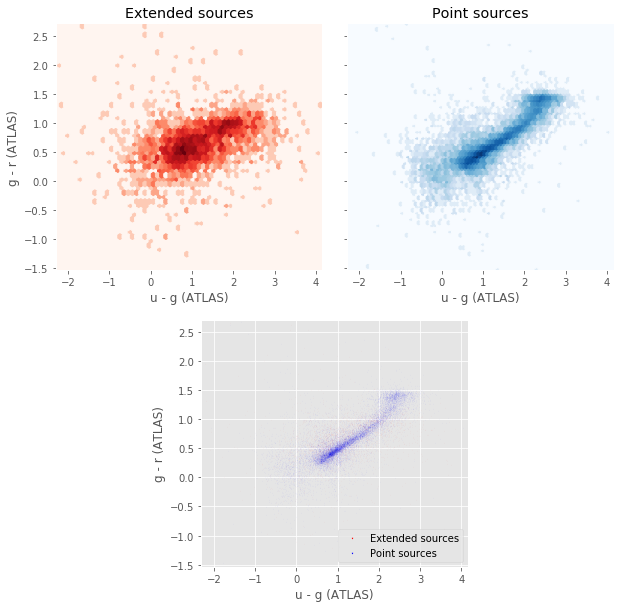

In [18]:
nb_ccplots(
    master_catalogue['m_atlas_u'] - master_catalogue['m_atlas_g'],
    master_catalogue['m_atlas_g'] - master_catalogue['m_atlas_r'],
    "u - g (ATLAS)", "g - r (ATLAS)",
    master_catalogue["stellarity"]
)

Number of source used: 44575 / 1623841 (2.75%)


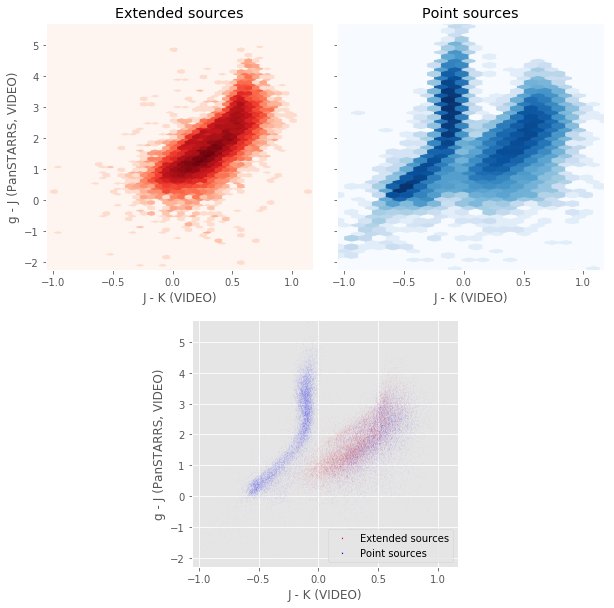

In [19]:
nb_ccplots(
    master_catalogue['m_video_j'] - master_catalogue['m_video_k'],
    master_catalogue['m_ps1_g'] - master_catalogue['m_video_j'],
    "J - K (VIDEO)", "g - J (PanSTARRS, VIDEO)",
    master_catalogue["stellarity"]
)

Number of source used: 62475 / 1623841 (3.85%)


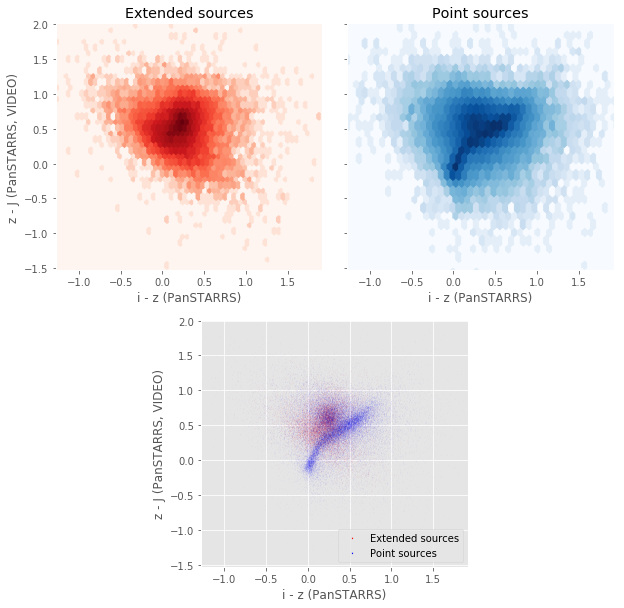

In [20]:
nb_ccplots(
    master_catalogue['m_ps1_i'] - master_catalogue['m_ps1_z'],
    master_catalogue['m_ps1_z'] - master_catalogue['m_video_j'],
    "i - z (PanSTARRS)", "z - J (PanSTARRS, VIDEO)",
    master_catalogue["stellarity"]
)

Number of source used: 28901 / 1623841 (1.78%)


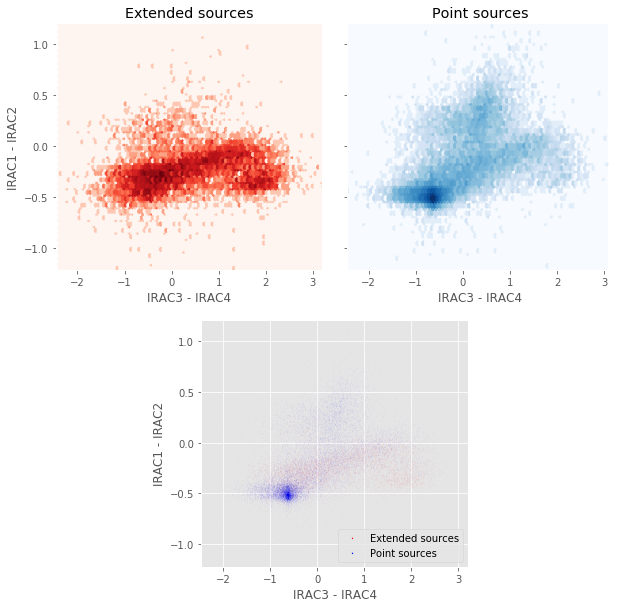

In [21]:
nb_ccplots(
    master_catalogue['m_irac3'] - master_catalogue['m_irac4'],
    master_catalogue['m_irac1'] - master_catalogue['m_irac2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)